# Lab 13 assignment

Text processing and visualization

We'll use a Python package `wordcloud` to make word clouds. To install, in your terminal type:

`pip install wordcloud`

If you don't have/know pip, you can manually install:

1. Download the package from [https://github.com/amueller/word_cloud/archive/master.zip](https://github.com/amueller/word_cloud/archive/master.zip) and unzip the file.

2. In your terminal, go to that folder (` cd word_cloud-master`)

3. Install the requirements:

`sudo pip install -r requirements.txt`

Install the package:

python setup.py install

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from wordcloud import WordCloud
import pandas as pd
import numpy as np

Let's go back to the IMDB dataset. We'll try to extract some meaningful keywords in the movie titles and make a word cloud with them.

In [2]:
df = pd.read_csv('imdb.csv', sep = '\t')
df.head(2)

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61


The `wordcloud` package takes a string as its input, so we'll make the titles into a big string.

In [5]:
text = ' '.join([i for i in df.Title.tolist()])

In [6]:
text[0:30]

'!Next? #1 Single #7DaysLater #'

In [7]:
wordcloud = WordCloud(max_font_size=40, max_words = 200, background_color="white").generate(text)

Note that you can tune these parameters, the options can be found [here](https://github.com/amueller/word_cloud/blob/master/examples/masked.py).

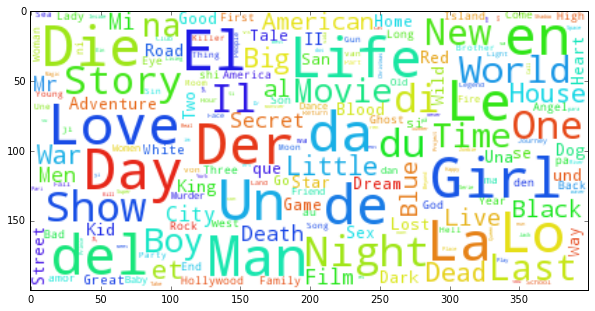

In [8]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud)

I'll make a function because we'll do this multiple times.

In [9]:
def draw_wordcloud(s):
    wordcloud = WordCloud(max_font_size=40, max_words = 200, background_color="white").generate(s)
    plt.figure(figsize = (10,7))
    plt.imshow(wordcloud)

What do you think about the word cloud? Are the words really meaningful?

As we discussed in class, the word cloud's quality is mostly determined by the quality of the text that we give it. We can do some text processing to improve the text's quality. NLTK is a classic Python package for such tasks.

The first step of any text processing is usually to  [tokenize](https://en.wikipedia.org/wiki/Tokenization_(lexical_analysis) the string: that is, break down the movie titles into words.

In [10]:
from nltk import word_tokenize

In [11]:
tokens = word_tokenize(text)

In [12]:
tokens[0:10]

['!', 'Next', '?', '#', '1', 'Single', '#', '7DaysLater', '#', 'Bikerlive']

There are a lot of non-word symbols. Let's get rid of them.

#TODO: remove the numbers and symbols in the tokens. Hint: you can use Python's [isalpha](https://docs.python.org/3/library/stdtypes.html#str.isalpha) function. After removal, it should look like the following:

In [14]:
tokens[0:10]

['Next',
 'Single',
 'Bikerlive',
 'ByMySide',
 'LawstinWoods',
 'lovemilla',
 'nitTWITS',
 'My',
 'Dad',
 'Says']

Some of these words, like "My", are not really meaningful: these are the so-called stopwords. We can pick them out and remove them. NLTK provides a list of common stop words.

In [15]:
from nltk.corpus import stopwords

In [16]:
st = stopwords.words('english')
st[0:5]

['i', 'me', 'my', 'myself', 'we']

In [17]:
#TODO: remove stop words in the tokens.

In [19]:
tokens[0:10]

['Next',
 'Single',
 'Bikerlive',
 'ByMySide',
 'LawstinWoods',
 'lovemilla',
 'nitTWITS',
 'Dad',
 'Says',
 'Chance']

Let's try the word cloud again.

In [20]:
text = ' '.join([i for i in tokens])

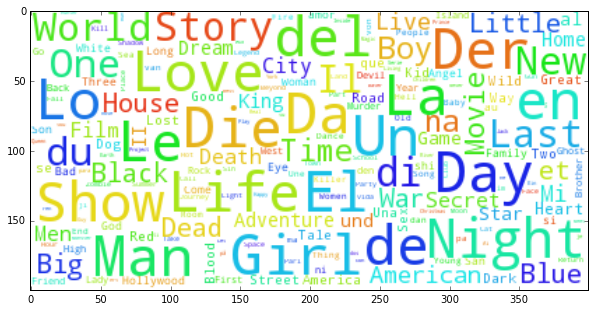

In [21]:
draw_wordcloud(text)

Maybe a little better, but not much?

We can also add words to the stopword list. In our case, we probably don't want the words like "One" on the picture.

In [22]:
st.append("one")

In [23]:
#TODO: add other words that are not meaningful and re-create the word cloud.

There are still a lot of words that we probably can't make sense of. Some of these, like "Der", "El", are likely non-English words.

To remove non-English words, a simple way is to check each word and see if it is in the English dictionary. One source of a collection of common English words is [here](http://www-01.sil.org/linguistics/wordlists/english/wordlist/wordsEn.txt). You can download and use it.

#TODO: remove non-English words. Hint: you likely want to convert the English word list to set with [set()](https://docs.python.org/3/tutorial/datastructures.html#sets) to speed up the search.

It removes some non-English words, but some others are still there. This may be because they also exist in the English volcabulary for whatever reason.

We may have to manually remove these by adding them to the stop words list.

In [31]:
#TODO: remove the other non-English words and make a word cloud.

Now we finally have a plot where most of the words we can make sense of. However, it seems still not very informative.

The most frequent words in a collection of texts may not be the most meaningful ones. To address this, there is a popular method called [TFIDF](http://www.tfidf.com/). In short, it is a way for evaluating the "importance" of words. We can pick out the most important words and draw a word cloud with them. sklearn has [an implementation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for this.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF works with a set of documents. Here I'll just divide the tokens into short sublists.

In [38]:
text = np.split(np.asarray(tokens), len(tokens)/3)
text = [' '.join([j for j in i.tolist()]) for i in text]

In [39]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit_transform(text)
tokens = vectorizer.get_feature_names()

By setting `max_features=1000`, I'm telling the vectorizer to only keep the top 1000 words with highest TFIDF scores. You can change this parameter and see how it influences the output.

In [40]:
#TODO: tune the max_features parameter and make another word cloud.